<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [4]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.datasets import make_classification
from collections import Counter

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Importacion de datos

Lecutra de tabla

In [6]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

Informacion de la tabla

In [7]:
tabla_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   desercion_año_anterior         4410 non-null   object 
 1   frecuencia_viajes              4410 non-null   object 
 2   departamento                   4410 non-null   object 
 3   distancia_domicilio            4410 non-null   int64  
 4   educacion                      4410 non-null   int64  
 5   formacion                      4410 non-null   object 
 6   nivel_de_cargo                 4410 non-null   int64  
 7   nombre_cargo                   4410 non-null   object 
 8   estado_civil                   4410 non-null   object 
 9   ingresos_mensuales             4410 non-null   int64  
 10  empresas_anteriores            4410 non-null   float64
 11  porcentaje_aumentosalario      4410 non-null   int64  
 12  nivel_de_opciones              4410 non-null   i

# Normalización

Variables numericas a categoricas

In [8]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
tiempo_prom_dia                  float64
dtype: object

Cambio de la variable respuesta, de object a int

In [9]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,nivel_de_cargo,nombre_cargo,estado_civil,ingresos_mensuales,empresas_anteriores,...,nivel_de_opciones,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,131160,1.0,...,0,1.0,6,0,3.0,4.0,2.0,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,41890,0.0,...,1,6.0,3,4,3.0,2.0,4.0,2,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,193280,1.0,...,3,5.0,2,3,2.0,2.0,1.0,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,83210,3.0,...,3,13.0,5,5,4.0,4.0,3.0,2,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,23420,4.0,...,2,9.0,2,4,4.0,1.0,3.0,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,60290,3.0,...,1,10.0,5,2,4.0,1.0,3.0,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,26790,2.0,...,0,10.0,2,2,4.0,4.0,3.0,2,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,37020,0.0,...,0,5.0,4,2,1.0,3.0,3.0,3,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,Divorced,23980,0.0,...,1,10.0,2,8,4.0,1.0,3.0,2,9.1876,0


Volviendo a dummies las variables categoricas predictoras

In [10]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,...,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,131160,1.0,11,0,1.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1
1,10,1,1,41890,0.0,23,1,6.0,4,3.0,...,0,0,1,0,0,0,1,0,0,0
2,17,4,4,193280,1.0,15,3,5.0,3,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2,5,3,83210,3.0,11,3,13.0,5,4.0,...,0,1,0,0,0,0,0,0,1,0
4,10,1,1,23420,4.0,12,2,9.0,4,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,60290,3.0,17,1,10.0,2,4.0,...,0,0,1,0,0,0,0,0,1,0
4406,2,4,1,26790,2.0,15,0,10.0,2,4.0,...,1,0,0,0,0,1,0,0,0,0
4407,25,2,2,37020,0.0,20,0,5.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
4408,18,2,1,23980,0.0,14,1,10.0,8,4.0,...,1,0,0,0,0,1,0,0,0,0


Separacion de datos, cambio de variables numericas tipo int a float y escalado de variables numericas

In [11]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# Modelo base

## Modelo base sin balanceo de clases

Construccion del modelo y exactitud en el entrenamiento

In [12]:
# Entrenamiento del modelo
modelo = LogisticRegression()
# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)
# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))

Exactitud en el entrenamiento: 0.865


 Exactitud en la validación

In [13]:
y_pred = modelo.predict(X_test_std)
# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.875


Matriz de confusión

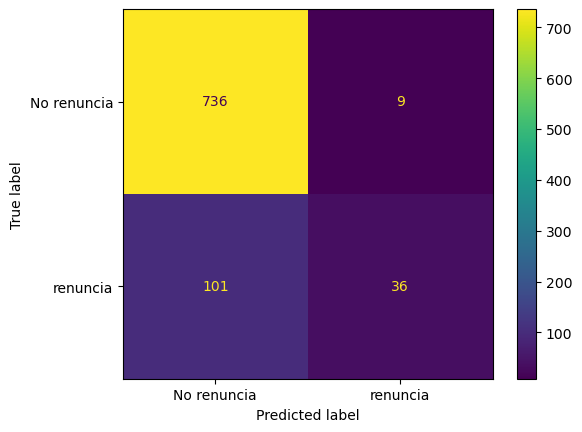

In [14]:
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [15]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.8
Recall: 0.26277372262773724
Especificidad: 0.9879194630872483
F1 score: 0.3956043956043957


La exactitud del modelo es 87%, sin embargo esta medida es mentirosa ya que las clases estan desbalanaceadas, es decir que el modelo entiende muy bien de cuando no renuncia un empleado.
Precision: El 80% de los predichos a desertar realmente lo haran.
Recall: este modelo es capaz de identificar solo el 26% de los empleados que realmente van a renunciar.
Por lo tanto se utilizara el mismo modelo con el hiperparametro class_weight para balancear las clases.

## Modelo base con balaceno de clases

Construccion del modelo y exactitud en el entrenamiento

In [17]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.746


 Exactitud en el validacion

In [18]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el validacion: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el validacion: 0.727


 Matriz de confusión

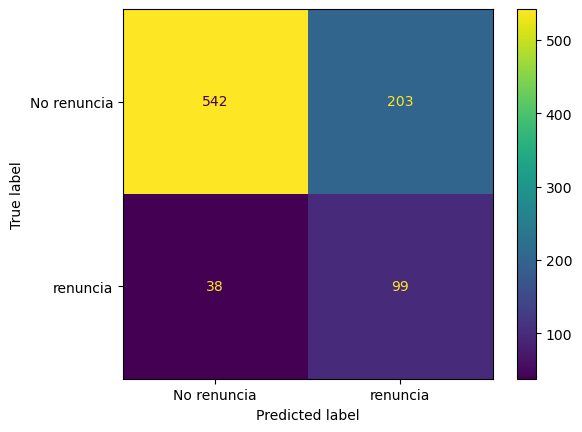

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

Metricas de desempeño

In [20]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.32781456953642385
Recall: 0.7226277372262774
Especificidad: 0.72751677852349
F1 score: 0.45102505694760814


La exactitud del modelo es de 72%, de esta forma se comprueba que esta medida es mentirosa cuando las clases estan desbalanceadas, al igualar las clases al modelo se le dificulta predecir correctamente las clases.
Precision: El 32% de los empleados predichos a desertar realmente lo haran, se evidencia una metrica muy baja, es decir que el modelo se equivoca en un 68% de las veces prediciendo si deserta o no.
Recall: este modelo es capaz de identificar 72% de los empleados que realmente van a renunciar, mejorando esta metrica obtenida anteriormente.

# Balanceo de clases manual

funcion smotetomek para el balanceo de clases

In [21]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(X_train_std, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 2964, 1: 564})
Distribution after resampling Counter({0: 2964, 1: 2964})


las clases se igualan en 2964 rsgistros, estos datos se utlizaran en un modelo de regresin logistica para realizar comparacines y ademas en el modelo gradient boosting, ya que este ultimo modelo no tiene hiperparametros para balancear las clases.

# Seleccion de variables


## Metodo integrado 

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

Seleccion de variables a partir del estimador lasso, recordemos que se puede utilizar otro estimador

In [35]:

sel_ = SelectFromModel(Lasso(alpha = 0.001, max_iter=10000), max_features=30) #entre mas aumente el parametro de serializacion, mas variables van atender a 0
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()#descarta los coeficientes mas cercanos a 0
X_train_base1 = X_train_std[:,X_new]
X_test_base1= X_test_std[:,X_new]
X_train.iloc[:,X_new]

[-2.90276233e-03 -9.12014525e-03 -1.29389353e-02 -9.01175817e-03
  3.08640006e-02  6.90255138e-03 -8.37903417e-04 -5.75542303e-02
 -2.35738771e-02 -4.42205112e-02 -4.37637142e-02 -2.69305095e-02
 -6.02194014e-03  7.08091124e-02 -5.60045656e-02  7.91914584e-02
 -0.00000000e+00  5.42803099e-02 -0.00000000e+00 -5.44611890e-03
  9.69618253e-02  2.66073719e-02 -4.08794449e-05  5.34849606e-03
 -1.17393152e-02 -1.60234187e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.55257612e-02 -4.54824255e-02  5.68093198e-02
  1.18051043e-02  9.11330196e-03 -1.72144473e-02 -1.75204275e-02
 -0.00000000e+00  1.14295646e-01  0.00000000e+00 -0.00000000e+00
  3.26894614e-02  3.41724543e-02 -0.00000000e+00 -2.05769343e-02
 -5.39772459e-02]


,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,...,nombre_cargo_Research Director,nombre_cargo_Research Scientist,nombre_cargo_Sales Executive,nombre_cargo_Sales Representative,estado_civil_Divorced,estado_civil_Single,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
2675,4,4,147320,0.0,12,10.0,7,2.0,1.0,3.0,...,0,0,1,0,0,1,0,1,0,0
4325,3,1,54700,1.0,18,12.0,10,3.0,1.0,3.0,...,0,0,1,0,1,0,1,0,0,0
1189,1,1,132470,1.0,14,15.0,11,4.0,4.0,2.0,...,0,0,0,0,1,0,0,1,0,0
3210,2,4,44240,3.0,14,18.0,3,2.0,3.0,3.0,...,0,0,0,1,0,0,1,0,0,0
557,4,1,26100,1.0,11,2.0,2,4.0,2.0,4.0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,3,1,66940,1.0,13,6.0,4,3.0,4.0,2.0,...,0,0,0,0,0,1,1,0,0,0
3364,3,1,23890,6.0,12,5.0,2,3.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4185,4,1,36730,3.0,14,19.0,0,4.0,4.0,4.0,...,0,0,1,0,0,0,0,1,0,0
4358,3,4,129360,1.0,11,4.0,2,4.0,2.0,2.0,...,0,0,0,0,1,0,0,1,0,0


variables elegidas, se eliminaron 16 columnas

In [36]:
X_train.iloc[:,X_new].columns

Index(['educacion', 'nivel_de_cargo', 'ingresos_mensuales',
       'empresas_anteriores', 'porcentaje_aumentosalario', 'años_de_trabajo',
       'años_jefe_actual', 'satisfaccion_entorno', 'satisfaccion_laboral',
       'conciliacion_faimilar_laboral', 'tiempo_prom_dia',
       'frecuencia_viajes_Non-Travel', 'frecuencia_viajes_Travel_Frequently',
       'departamento_Human Resources', 'formacion_Human Resources',
       'formacion_Life Sciences', 'formacion_Other',
       'formacion_Technical Degree', 'nombre_cargo_Manager',
       'nombre_cargo_Manufacturing Director', 'nombre_cargo_Research Director',
       'nombre_cargo_Research Scientist', 'nombre_cargo_Sales Executive',
       'nombre_cargo_Sales Representative', 'estado_civil_Divorced',
       'estado_civil_Single', 'numero_capacitaciones_2',
       'numero_capacitaciones_3', 'numero_capacitaciones_5',
       'numero_capacitaciones_6'],
      dtype='object')

## Método Wrapper 

Seleccion de variables por medio del seleccionador recursivo de sklearn

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  return X_new  

Variables elegidas por la funcion recursive_feature_selection

In [18]:
# Establecer Estimador
model = LogisticRegression(max_iter=100)
# Obtener columnas seleciconadas - (30 caracteristicas)
X_new_class = recursive_feature_selection(X_train_std, y_train, model, 30)

# Nuevo conjunto de datos
X_train_base2 = X_train_std[:,X_new_class]
X_test_base2= X_test_std[:,X_new_class]
X_train.iloc[:,X_new_class]

Num Features: 30
Selected Features: [False False False False  True False False  True  True  True  True  True
 False  True  True  True False  True  True  True  True  True  True False
  True  True False False False  True  True  True False  True  True  True
  True  True  True False  True  True False  True  True]
Feature Ranking: [ 8  7  3  4  1  5 12  1  1  1  1  1  6  1  1  1 15  1  1  1  1  1  1 16
  1  1 11 14 10  1  1  1  2  1  1  1  1  1  1 13  1  1  9  1  1]


,empresas_anteriores,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,tiempo_prom_dia,frecuencia_viajes_Non-Travel,frecuencia_viajes_Travel_Frequently,departamento_Human Resources,...,nombre_cargo_Sales Executive,nombre_cargo_Sales Representative,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
2675,0.0,10.0,7,2.0,1.0,3.0,6.8529,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4325,1.0,12.0,10,3.0,1.0,3.0,6.3337,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1189,1.0,15.0,11,4.0,4.0,2.0,7.0588,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3210,3.0,18.0,3,2.0,3.0,3.0,7.8252,0,1,0,...,0,1,0,1,0,0,1,0,0,0
557,1.0,2.0,2,4.0,2.0,4.0,9.9695,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1.0,6.0,4,3.0,4.0,2.0,5.7975,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3364,6.0,5.0,2,3.0,2.0,3.0,6.9008,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4185,3.0,19.0,0,4.0,4.0,4.0,6.2989,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4358,1.0,4.0,2,4.0,2.0,2.0,7.8275,0,0,0,...,0,0,1,0,0,0,0,1,0,0


Columnas elegidas, se eliminaron 16 columnas

In [19]:
X_train.iloc[:,X_new_class].columns

Index(['empresas_anteriores', 'años_de_trabajo', 'años_jefe_actual',
       'satisfaccion_entorno', 'satisfaccion_laboral',
       'conciliacion_faimilar_laboral', 'tiempo_prom_dia',
       'frecuencia_viajes_Non-Travel', 'frecuencia_viajes_Travel_Frequently',
       'departamento_Human Resources', 'departamento_Research & Development',
       'departamento_Sales', 'formacion_Human Resources',
       'formacion_Life Sciences', 'formacion_Marketing', 'formacion_Other',
       'formacion_Technical Degree', 'nombre_cargo_Manager',
       'nombre_cargo_Manufacturing Director', 'nombre_cargo_Research Director',
       'nombre_cargo_Sales Executive', 'nombre_cargo_Sales Representative',
       'estado_civil_Divorced', 'estado_civil_Married', 'estado_civil_Single',
       'numero_capacitaciones_0', 'numero_capacitaciones_2',
       'numero_capacitaciones_3', 'numero_capacitaciones_5',
       'numero_capacitaciones_6'],
      dtype='object')

# Modelo 1 de Regresión Logística

### Modelo 1.1 Regresion logistica con Lasso

Construccion del modelo y exactitud en el entrenamiento 

In [30]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base1, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.747


Exactitud en la validacion

In [31]:
y_pred = modelo.predict(X_test_base1)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.734


 Matriz de confusión

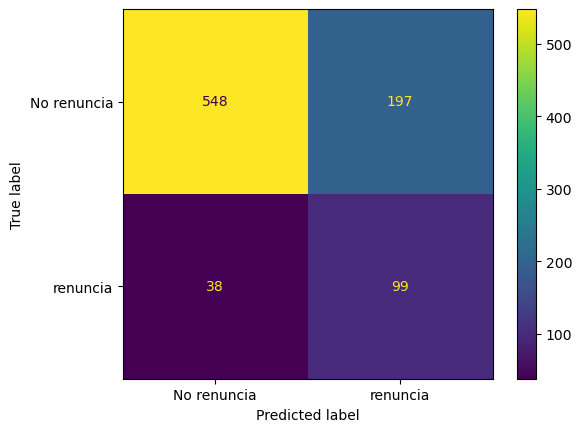

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [33]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3344594594594595
Recall: 0.7226277372262774
Especificidad: 0.7355704697986577
F1 score: 0.45727482678983833


La exactitud del modelo es 73%, mejorando el accuracy del modelo base sin seleccion de variables, aunque en poca magnitud.
Precision: El 33% de los predichos a desertar realmente lo haran, mejoro en un 1% la precision del modelo base.
Recall: este modelo es capaz de identificar el 72% de los empleados que realmente van a renunciar, igual valor al modelo base.
Del modelo base a este modelo construido con la base 1, no presenta muchas mejoras, es decir que eliminar estas 16 varibles no mejoro los resultados.

### Modelo 1.2 regresion logistica con Wrapper

Construccion del modelo y exactitud en el entrenamiento

In [36]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base2, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base2)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.741


Exactitud en la validacion

In [37]:
y_pred = modelo.predict(X_test_base2)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.723


Matriz de Confusión

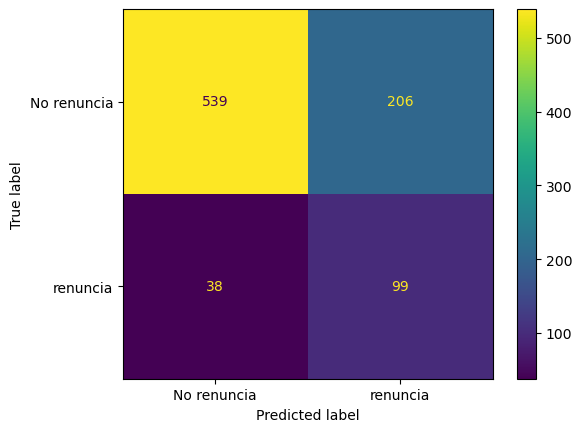

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [39]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.32459016393442625
Recall: 0.7226277372262774
Especificidad: 0.723489932885906
F1 score: 0.44796380090497734


La exactitud del modelo es 72%, igualando el accuracy del modelo base sin seleccion de variables.
Precision: El 33% de los predichos a desertar realmente lo haran, igualo la precision del modelo base.
Recall: este modelo es capaz de identificar el 72% de los empleados que realmente van a renunciar, igual valor al modelo base.
Del modelo base a este modelo construido con la base 2, no presenta mejoras, es decir que eliminar estas 16 varibles no mejoro los resultados.

### Modelo 1.3 regresion logistica con balanceo de clases manual

 Construccion del modelo y xactitud en el entrenamiento 

In [41]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142)

# Ajustar el modelo a los datos
modelo.fit(x_train_res, y_train_res)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(x_train_res)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train_res, y_train_pred2) )

Exactitud en el entrenamiento: 0.765


 Exactitud en la validación 

In [42]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.738


 Matriz de confusión 

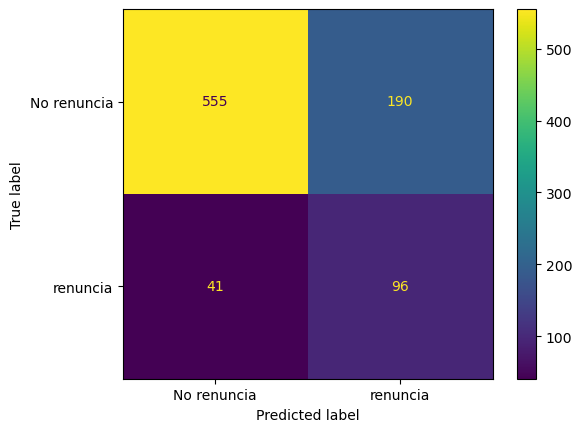

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [44]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3356643356643357
Recall: 0.7007299270072993
Especificidad: 0.7449664429530202
F1 score: 0.4539007092198582


La exactitud de este modelo es del 73% y del modelo base con el balanceo de hiperparametro la es del 72%, la precision de este modelo es del 32% y del modelo base es 32%, el recall de este modelo es del 70% y del modelo base es del 72%. Finalmente se puede concluir que utilizar el class_weight o balancear las clases manualmente producen similares resultados.

A partir de este punto se trabajara con el hiperparametro, solo para el modelo de gradient boosting se utilizara los datos balanceados manualmente.

# Modelo 2 Random Forest Classifier

### 2.1 Modelo random forest con metodo integrado

Construccion del modelo

In [45]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3=X_train_base1
X_test_modelo3=X_test_base1

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

Metricas de desempeño

In [46]:

print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3)))

Train - Accuracy : 0.7939342403628118
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      2954
           1       0.42      0.73      0.54       574

    accuracy                           0.79      3528
   macro avg       0.68      0.77      0.70      3528
weighted avg       0.86      0.79      0.81      3528

Test - Accuracy : 0.8027210884353742
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.83      0.88       745
           1       0.42      0.68      0.52       137

    accuracy                           0.80       882
   macro avg       0.68      0.75      0.70       882
weighted avg       0.85      0.80      0.82       882



La exactitud del modelo es 80%, mejorando los resultados del modelo regresion logistica para la tabla de datos 1.
Precision: El 42% de los predichos a desertar realmente lo haran, mejorando los resultados del modelo regresion logistica para la tabla de datos 1.
Recall: este modelo es capaz de identificar el 68% de los empleados que realmente van a renunciar, desmejorando los resultados del modelo de regresion logistica para la tabla 1.
Este modelo mejora en poca cantidad el modelo de regresion logistica.





 Matriz de confusión 

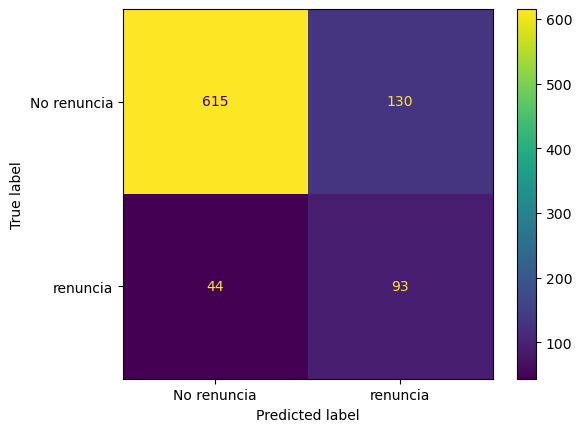

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, ranfor.predict(X_test_modelo3))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['No renuncia', 'renuncia'])
cm_display.plot()
plt.show()

### Modelo con tuning de hiperparametros

Cuadricula de hiperparametros

In [48]:
parameters = {'max_depth': [ 1, 3, 5, 7],
              'max_features': [0.05,0.4, 1],
              'max_leaf_nodes': [4,7,9, 15],
              'min_samples_leaf': [0.5, 1,3,5],
              'n_estimators': [10, 20, 30, 40]}

Busqueda en cuadricula

In [49]:
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo3, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'max_depth': 5, 'max_features': 0.4, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'n_estimators': 10}
Best Score:  -0.03409489706257858


Construccion del modelo

In [50]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3=X_train_base1
X_test_modelo3=X_test_base1

ranfor = RandomForestClassifier(class_weight="balanced", max_features=0.4, n_estimators = 10, max_depth= 5,max_leaf_nodes = 15, min_samples_leaf=3, n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.4,
                       max_leaf_nodes=15, min_samples_leaf=3, n_estimators=10,
                       n_jobs=-1, random_state=123)

Metricas de desempeño

In [51]:

print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3)))

Train - Accuracy : 0.7947845804988662
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      2954
           1       0.42      0.72      0.53       574

    accuracy                           0.79      3528
   macro avg       0.68      0.77      0.70      3528
weighted avg       0.85      0.79      0.81      3528

Test - Accuracy : 0.8027210884353742
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.83      0.88       745
           1       0.41      0.65      0.51       137

    accuracy                           0.80       882
   macro avg       0.67      0.74      0.69       882
weighted avg       0.85      0.80      0.82       882



La exactitud del modelo tuneado es 80%, igualando los resultados del modelo regresion logistica para la tabla de datos 1.
Precision: El 41% de los predichos a desertar realmente lo haran, desmejorando los resultados del modelo regresion logistica para la tabla de datos 1.
Recall: este modelo es capaz de identificar el 65% de los empleados que realmente van a renunciar, desmejorando los resultados del modelo de regresion logistica para la tabla 1.
Este modelo desmejora en poca cantidad el modelo de regresion logistica, se debe de buscar nuvos hiperparametros para optimizar el modelo.



### 2.2 Modelo random forest con metodo wrapper

Construccion del modelo

In [52]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3_2=X_train_base2
X_test_modelo3_2=X_test_base2

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3_2, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

Metricas de desempeño

In [53]:

print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3_2)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3_2)))

Train - Accuracy : 0.7953514739229025
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      2954
           1       0.42      0.72      0.53       574

    accuracy                           0.80      3528
   macro avg       0.68      0.77      0.70      3528
weighted avg       0.85      0.80      0.81      3528

Test - Accuracy : 0.7959183673469388
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.82      0.87       745
           1       0.41      0.68      0.51       137

    accuracy                           0.80       882
   macro avg       0.67      0.75      0.69       882
weighted avg       0.85      0.80      0.81       882



La exactitud del modelo es 79%, mejorando los resultados del modelo regresion logistica para la tabla de datos 2.
Precision: El 41% de los predichos a desertar realmente lo haran, mejorando los resultados del modelo regresion logistica para la tabla de datos 2.
Recall: este modelo es capaz de identificar el 68% de los empleados que realmente van a renunciar, desmejorando los resultados del modelo de regresion logistica para la tabla 2.
Este modelo mejora en poca cantidad el modelo de regresion logistica.

Finalmente los dos modelos con las dos tablas presentan similares resultados


 Matriz de Confusión

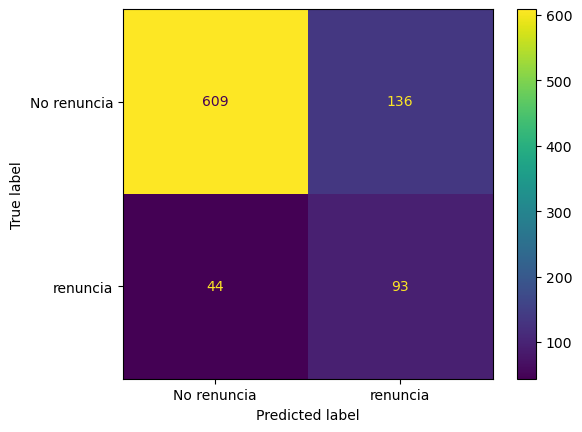

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, ranfor.predict(X_test_modelo3_2))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels=['No renuncia', 'renuncia'])
cm_display.plot()
plt.show()

# Modelo 3 Gradient Boosting Classifier

### 3.1 Modelo de Gradient Boosting con metodo integrado

Construccion del modelo

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4= x_train_res[:, X_new]
X_test_modelo4 = X_test_std[:, X_new]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

Metricas de desempeño

In [56]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4)))

Train - Accuracy : 0.8992890995260664
Train - classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2954
           1       0.91      0.89      0.90      2954

    accuracy                           0.90      5908
   macro avg       0.90      0.90      0.90      5908
weighted avg       0.90      0.90      0.90      5908

Test - Accuracy : 0.8741496598639455
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.92      0.92       745
           1       0.59      0.65      0.62       137

    accuracy                           0.87       882
   macro avg       0.76      0.78      0.77       882
weighted avg       0.88      0.87      0.88       882



La exactitud del modelo es 87%, mejorando los resultados del modelo de random foreste para la tabla de datos 1.
Precision: El 59% de los predichos a desertar realmente lo haran, mejorando los resultados del modelo regresion logistica para la tabla de datos 1.
Recall: este modelo es capaz de identificar el 65% de los empleados que realmente van a renunciar, desmejorando los resultados del modelo de regresion logistica para la tabla 1.
Este modelo mejora el modelo de random forest aplicado a la tabla 1, aca se sospecha que este puede ser de los mejores modelos a tomar por la empresa

 Matriz de confusión

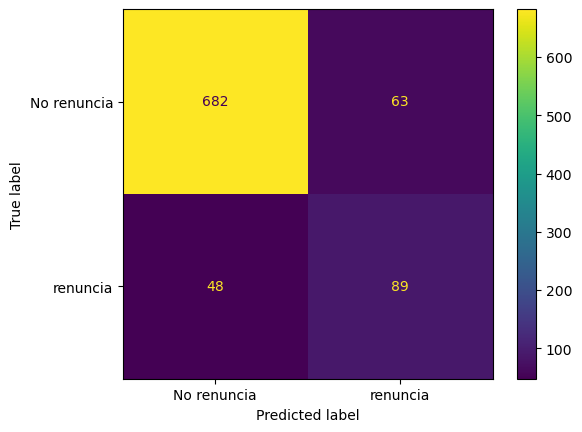

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

Curva ROC

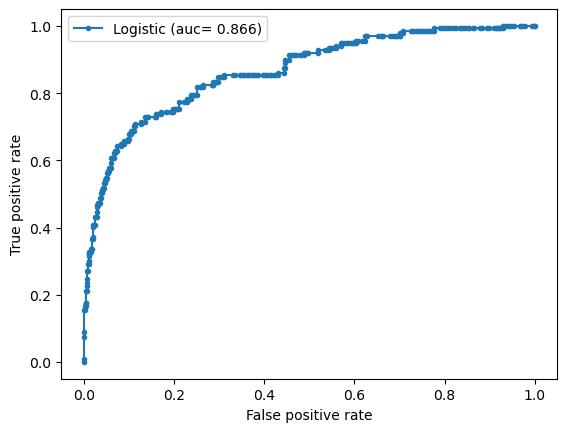

In [58]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred = gboos.predict_proba(X_test_modelo4)[::,1]
fpr, tpr,_ =roc_curve(y_test, y_pred)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test, y_pred) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### Modelo con tunning de hiperparametros

Cuadricula de hiperparametros

In [59]:
parameters = {'learning_rate': [0.05, 0.1,0.3],
              'max_features': [2, 4, 6, 8],
              'max_depth': [4,6,8,10,12],
              'n_estimators': [80, 100, 150, 200]}

Busqueda en cuadricula

In [60]:
#Definición del modelo
from sklearn.ensemble import GradientBoostingClassifier
ranfor = GradientBoostingClassifier(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo4, y_train_res)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'learning_rate': 0.3, 'max_depth': 10, 'max_features': 2, 'n_estimators': 80}
Best Score:  0.969539705755829


Construccion del modelo

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4= x_train_res[:, X_new]
X_test_modelo4 = X_test_std [:, X_new]
gboos = GradientBoostingClassifier( n_estimators = 150, max_depth= 12, learning_rate= 0.3, max_features = 2, random_state = 123)
gboos.fit(X_train_modelo4, y_train_res)

GradientBoostingClassifier(learning_rate=0.3, max_depth=12, max_features=2,
                           n_estimators=150, random_state=123)

Metricas de desempeño

In [38]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2964
           1       1.00      1.00      1.00      2964

    accuracy                           1.00      5928
   macro avg       1.00      1.00      1.00      5928
weighted avg       1.00      1.00      1.00      5928

Test - Accuracy : 0.9931972789115646
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       0.98      0.98      0.98       147

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



La exactitud del modelo tuneado es 99%, igualando los resultaods del modelo regresion logistica para la tabla de datos 1.
Precision: El 98% de los predichos a desertar realmente lo haran, mejorando los resultados del modelo regresion logistica para la tabla de datos 1.
Recall: este modelo es capaz de identificar el 98% de los empleados que realmente van a renunciar, mejorando los resultados del modelo de regresion logistica para la tabla 1.
Este modelo con el tuning de hiperparametros presenta las mejores metricas hasta el momento, hasta este punto se puede tomar la decision de elegir este modelo


Matriz de confusión 

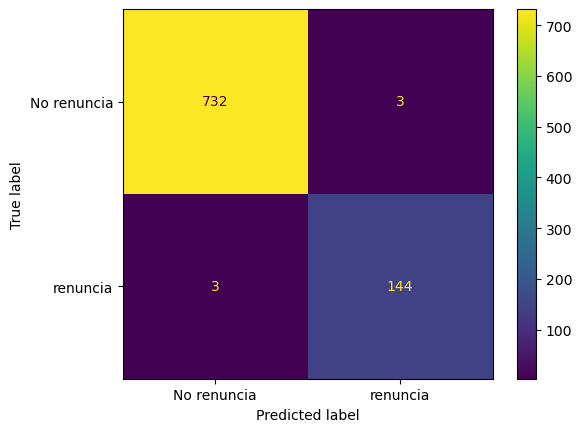

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

Curva ROC

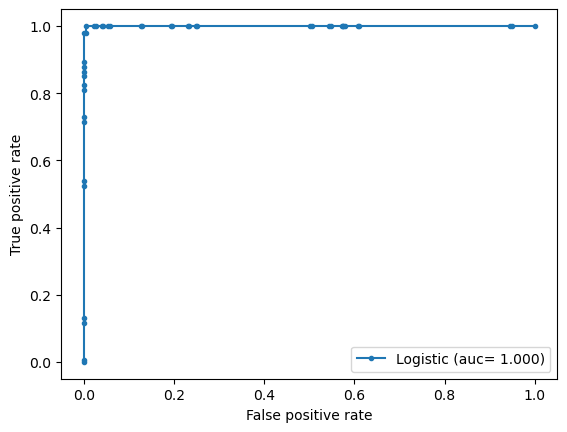

In [40]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred = gboos.predict_proba(X_test_modelo4)[::,1]
fpr, tpr,_ =roc_curve(y_test, y_pred)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test, y_pred) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Selección de la variable más representativa

Text(0.5, 0, 'Gradient Boosting classifier Feature Importance')

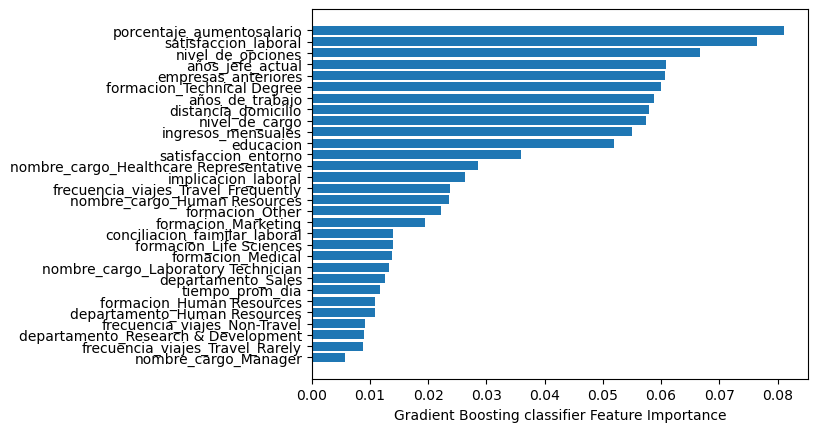

In [41]:
importance = gboos.feature_importances_
sorted_idx = gboos.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Gradient Boosting classifier Feature Importance")

### 3.2 Modelo de Gradient Boosting con metodo wrapper

Construccion del modelo

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4_2= x_train_res[:, X_new_class]
X_test_modelo4_2 = X_test_std[:, X_new_class]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4_2, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

Metricas de desempeño

In [66]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4_2)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4_2)))

Train - Accuracy : 0.8945497630331753
Train - classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2954
           1       0.90      0.88      0.89      2954

    accuracy                           0.89      5908
   macro avg       0.89      0.89      0.89      5908
weighted avg       0.89      0.89      0.89      5908

Test - Accuracy : 0.8775510204081632
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.92      0.93       745
           1       0.59      0.66      0.63       137

    accuracy                           0.88       882
   macro avg       0.77      0.79      0.78       882
weighted avg       0.88      0.88      0.88       882



La exactitud del modelo es 87%, mejorando los resultados del modelo de random forest para la tabla de datos 2.
Precision: El 59% de los predichos a desertar realmente lo haran, mejorando los resultados del modelo de random forest para la tabla de datos 2.
Recall: este modelo es capaz de identificar el 66% de los empleados que realmente van a renunciar, desmejorando los resultados del modelo de random forest para la tabla 2.
Este modelo mejora el modelo de random forest para la tabla 2.

Finalmente los dos modelos con las dos tablas ambos modelos de gradient boosting presentan similares resultados






Matriz de confusión 

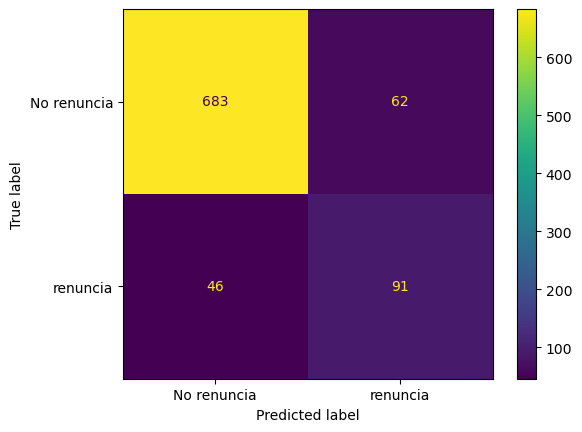

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

Por los resultados del modelo de gradient boosting con los hiperparametros tuneados, se toma la decision de elegir este modelo. Ahora se va a probar un ultimo modelo, en este solo se va analizar el modelo con los hiperparametros tuneados

# Modelo 4 Support Vector Machine 

### 4.1 Modelo de support vector machine con metodo integrado

Construccion del modelo

In [68]:
from sklearn.svm import SVC
X_train_modelo5=X_train_base1
X_test_modelo5=X_test_base1
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

Metricas de desempeño

In [69]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5)))

Train - Accuracy : 0.7417800453514739
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83      2954
           1       0.36      0.77      0.49       574

    accuracy                           0.74      3528
   macro avg       0.65      0.75      0.66      3528
weighted avg       0.85      0.74      0.77      3528

Test - Accuracy : 0.7324263038548753
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.73      0.82       745
           1       0.33      0.72      0.46       137

    accuracy                           0.73       882
   macro avg       0.63      0.73      0.64       882
weighted avg       0.84      0.73      0.77       882



Matriz de confusión 

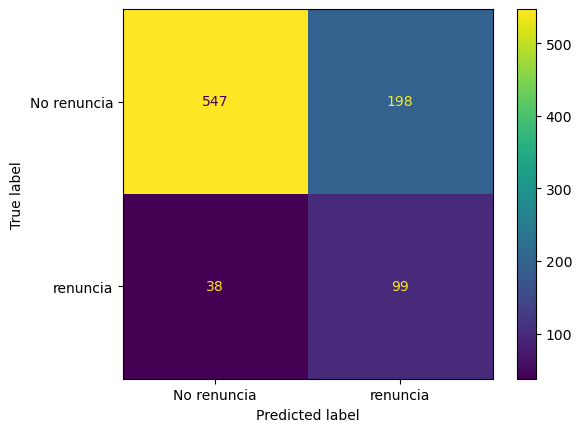

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

### Modelo support vector machine con hiperparametros optimizados

Cuadricula de hiperparametros

In [71]:
parameters = {'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
              'C': [-1,0.01, 0.08, 1.5, 3], 
              'max_iter': [-1, 0.08, 1, 5, 10],} 

Busqueda en cuadricula

In [72]:
#Definición del modelo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
ranfor = SVC(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo5, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 3, 'kernel': 'poly', 'max_iter': -1}
Best Score:  0.6399987714724081


Construccion del modelo

In [73]:
from sklearn.svm import SVC
X_train_modelo5=X_train_base1
X_test_modelo5=X_test_base1
svm_model = SVC(C = 3, kernel = 'rbf', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5, y_train)

SVC(C=3, class_weight='balanced', random_state=123)

Metricas de desempeño

In [74]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5)))

Train - Accuracy : 0.9923469387755102
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2954
           1       0.96      1.00      0.98       574

    accuracy                           0.99      3528
   macro avg       0.98      0.99      0.99      3528
weighted avg       0.99      0.99      0.99      3528

Test - Accuracy : 0.9773242630385488
Test - classification report :               precision    recall  f1-score   support

           0       0.99      0.98      0.99       745
           1       0.89      0.97      0.93       137

    accuracy                           0.98       882
   macro avg       0.94      0.97      0.96       882
weighted avg       0.98      0.98      0.98       882



La exactitud del modelo tuneado es 97%, un poco menos que el modelo de gradient boosting.
Precision: El 89% de los predichos a desertar realmente lo haran, desmejorando los resultados del modelo de gradient boosting.
Recall: este modelo es capaz de identificar el 97% de los empleados que realmente van a renunciar, desmejorando los resultados del modelo de gradient boosting.
Este modelo con el tuning de hiperparametros presenta las segundas mejores metricas hasta el momento.


###  4.2 Modelo support vector machine con metodo wrapper


Construccion del modelo

In [75]:
from sklearn.svm import SVC
X_train_modelo5_2=X_train_base2
X_test_modelo5_2=X_test_base2
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5_2, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

Metricas de desempeño

In [76]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5_2)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5_2)))

Train - Accuracy : 0.735827664399093
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82      2954
           1       0.35      0.76      0.48       574

    accuracy                           0.74      3528
   macro avg       0.65      0.74      0.65      3528
weighted avg       0.84      0.74      0.77      3528

Test - Accuracy : 0.7154195011337868
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.71      0.81       745
           1       0.32      0.72      0.44       137

    accuracy                           0.72       882
   macro avg       0.63      0.72      0.63       882
weighted avg       0.84      0.72      0.75       882



Matriz de confusión 

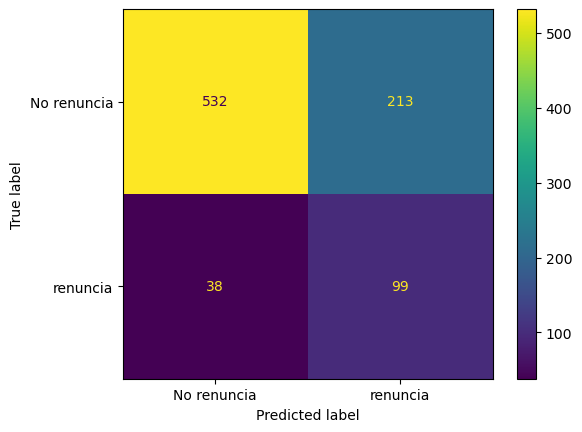

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

# ANALISIS DE RESULTADOS

![Alt text](image.png)

Nota: el modelo base se trata de una regresión logística con la tabla exportada luego del análisis exploratorio.

A continuación se harán varios análisis comparativos entre modelos.

Modelo base sin balanceo de clases vs modelo base con balanceo de clases

En esta primera comparación se deseaba encontrar las diferencias que se encontraban en un modelo de regresión logística al aplicar el hiperparámetro class weight, es decir al balancear las clases de la bases de datos, en los resultados se obtuvo que el accuracy en el modelo base sin balanceo en el test es 0,851 y en el modelo con balanceo de clases 0,711. Esto sucede porque el modelo es muy bueno prediciendo cuando no renuncia un empleado, ya que en los datos se está encontrando en su mayoría empleados que no renuncian, por lo tanto este modelo sin balancear no generaliza.

De aquí para adelante cuando se mencione el modelo base se trata del modelo de regresión logística con el balanceo de clases.

Modelo base sin selección de variables vs otros modelos con selección de variables

Recordemos que el accuracy significa la exactitud con la que el modelo clasifica correctamente, es decir las veces que acierta, además en esta comparación no se incluye el tuning de hiperparametros. Para esta comparación todos los modelos obtuvieron un mejor accuracy en el entrenamiento, sin embargo desmejoró en muy poca cantidad el accuracy en test para el caso de la regresión logística para ambas bases y el support vector machine con la base 2, en los demás se demostró que la selección de variables aporta significativamente a los resultados del modelo, esto se puede evidenciar en tabla superior.

Modelo de regresión logística con balanceo de clases de hiperparámetro vs modelo de regresión logística con datos de entrada balanceados

En esta comparación se quería poner a prueba cómo se podían obtener mejor resultados, a partir del hiperparámetro class weight o el balanceo manual con la función SMOTETomek(), esto se probó por medio del modelo de regresión logística, en la exactitud del modelo se observa que los dos en el test tienen aproximadamente un accuracy del 70%, por lo que se concluye que seguir trabajando con el hiperparametro o con los datos balanceados a partir del función seguirá cumpliendo de buena forma para obtener buenos resultados.

Método de selección de variables: integrados (Lasso) vs wrapper (RFE)

Para determinar qué método de selección de variables tendría mejor resultados se realizó un promedio para cada método de los 4 modelos en donde se aplicó (regresión logistica, random forest, gradient boosting y support vector machine), el promedio del accuracy del método integrado en los test es del 75.95% y en el método wrapper es 75.90%, concluyendo que los dos métodos obtienen una exactitud promedio muy similar, sin embargo esto podría variar dependiendo el modelo. Por las razones anteriores el tuning de hiperparametros se realizará a los modelos random forest, gradient boosting y support vector machine únicamente con la base 1, es decir con las variables predictoras elegidas por el método integrado.

Modelos sin tuning de hiperparametros vs modelos con tuning de hiperparametros

El método para buscar los mejores hiperparametros es la búsqueda en cuadrícula, se aplicó para los modelos random forest, gradient boosting y support machine, en todos la métrica de evaluación elegida para encontrar el mejor modelo fue el R2. Los R2 se exponen a continuación:

Random forest classifier: -3,4%
Gradient boosting classifier: 96,95%
support vector machine:63,99%

El gradient Boosting fue el modelo que mejor hiperparametros encontró obteniendo un R2 muy alto, es decir que este modelo es capaz de predecir en un 97% si un empleado renuncia o no. Luego el support vector machine fue el segundo modelo con mejores resultados, gracias también a la optimización de estos hiperparametros. Finalmente para el modelo random forest los hiperparametros desmejoraron el modelo sin tuning, se debe de buscar nuevos hiperparámetros para mejorar los resultados.

Análisis de overfitting

El modelo que tiene mayor sobreajuste es el gradiente boosting classifier, con la base 1 obtuvo un accuracy en train de 90,9% y en test 83,6%, para la base 2 obtuvo en train 90,7% y en test 84,9%, sin embargo la diferencia entre los valores del train y test no están tan alejados, por lo que se puede continuar con alguno de los dos modelos, sin embargo los resultados mostraron que este modelo con el tuning de hiperparametros aprendía y lograba generalizar.

Modelo seleccionado

Teniendo en cuenta que las métricas para seleccionar el modelo principalmente eran el accuracy y el recall se concluyó que el mejor modelo es el gradient boosting classifier, sus métricas fueron las siguientes:

Accuracy: la exactitud del modelo es de 98,9%, es decir que el modelo acierta el 99% de las veces, el modelo está generalizando.
Recall: el modelo es capaz de identificar el 96% de los empleados que van a renunciar.
precisión: un 98% de los empleados predichos que van a renunciar realmente lo harán, es decir que el modelo solo se equivocara en un 2% de las veces que un empleado va a renunciar.
f1-score: 99%, asume la importancia de la precisión y la exhaustividad del modelo.

Es importante resaltar que la importancia del recall se respalda en que para la empresa es vital poder predecir bien sobre las personas que en verdad van a renunciar, para poder tomar posturas anticipadamente y evitar la deserción, mejorando el área de recursos humanos, poder darle continuidad a proyectos de sus empleados antiguos y evitando tiempos muertos para sus nuevos empleados mientras se adaptan. A continuación se mostrará la matriz de confusión del modelo de gradient boosting con la base 1 pero sin tuning de hiperparametros (figura 1), además el mismo modelo pero con el tuning de hiperparametros (figura 3)
 
En la matriz de confusión se observa que los true positives y true negative cuando se hace tuning de hiperparametros aumentan, además el número de falsos positivos y falsos negativos disminuye drásticamente, evitando cometer el error tipo 1 y tipo 2.
En la curva ROC el área bajo la curva aumenta casi llegando a 1, la medida de sensibilidad pasa de 86% a un 99%, lo que indica que el modelo es capaz de distinguir entre las clases, es decir predecir correctamente la deserción de un empleado.

En general todos los modelos realizados, sin incluir el base, los modelos de gradient boosting y el modelo optimizado de support vector machine, obtienen mayor sensibilidad que precisión, es decir que los modelos cometen más el error tipo 1. En los modelos optimizados menos el de random forest se evitan en gran cantidad los escenarios de cometer el error tipo 1 y tipo 2, es decir que tienen un buenas métricas en precisión y sensibilidad, el modelo de random forest se debe hacer tuning nuevamente. En la tabla 1 se puede realizar estas comparaciones.

